In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the font: Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# 工具代码

In [2]:
def compute_k(
    E_L_list: dict,
    S: float = 3.1415 * (0.004 ** 2)
):
    inv_k = 0
    for E, L in E_L_list.values():
        inv_k += L / (E * S)
    return 1 / inv_k

def show_performance(
    v_in: float,
    k: float,
    c: float = 3.0,
    m: float = 2.7 * (10 ** -3)
):
    omega_d = np.sqrt(k / m - c**2 / (4 * m**2))

    def v(t):
        return v_in * np.exp(-c/(2*m)*t) * (np.cos(omega_d*t) - c/(2*m*omega_d) * np.sin(omega_d*t))

    t0 = 3.1415 / omega_d
    v_t0 = v(t0)

    return t0, v_t0

def result(
    E_L_list: dict,
    v_in: float,
    S: float = 3.1415 * (0.004 ** 2),
    c: float = 3.0,
    m: float = 2.7 * (10 ** -3),
    print_result: bool = True
):
    k = compute_k(E_L_list, S)
    t0, v_t0 = show_performance(v_in, k, c, m)
    if(print_result):
        print("========== Result ==========")
        print(f"Spring constant: k = {round(k, 2)}")
        print(f"Time: t = {round(t0 * 1000, 2)} ms, bounce speed: v(t) = {round(v_t0, 2)} m/s")
    return k, t0, v_t0


In [3]:
std_racket = {
    "wood": [1.2 * 10**9, 3 * 10**-3],
    "sponge": [1 * 10**6, 2.1 * 10**-3],
    "rubber": [2 * 10**6, 1.5 * 10 ** -3],
}

result(std_racket, 10)

========== Result ==========
Spring constant: k = 17621.03
Time: t = 1.26 ms, bounce speed: v(t) = -4.97 m/s


(17621.034180543378, 0.0012598630397329857, -4.966333396610013)

# 实验
## 1. 海绵厚度对球拍性能的影响

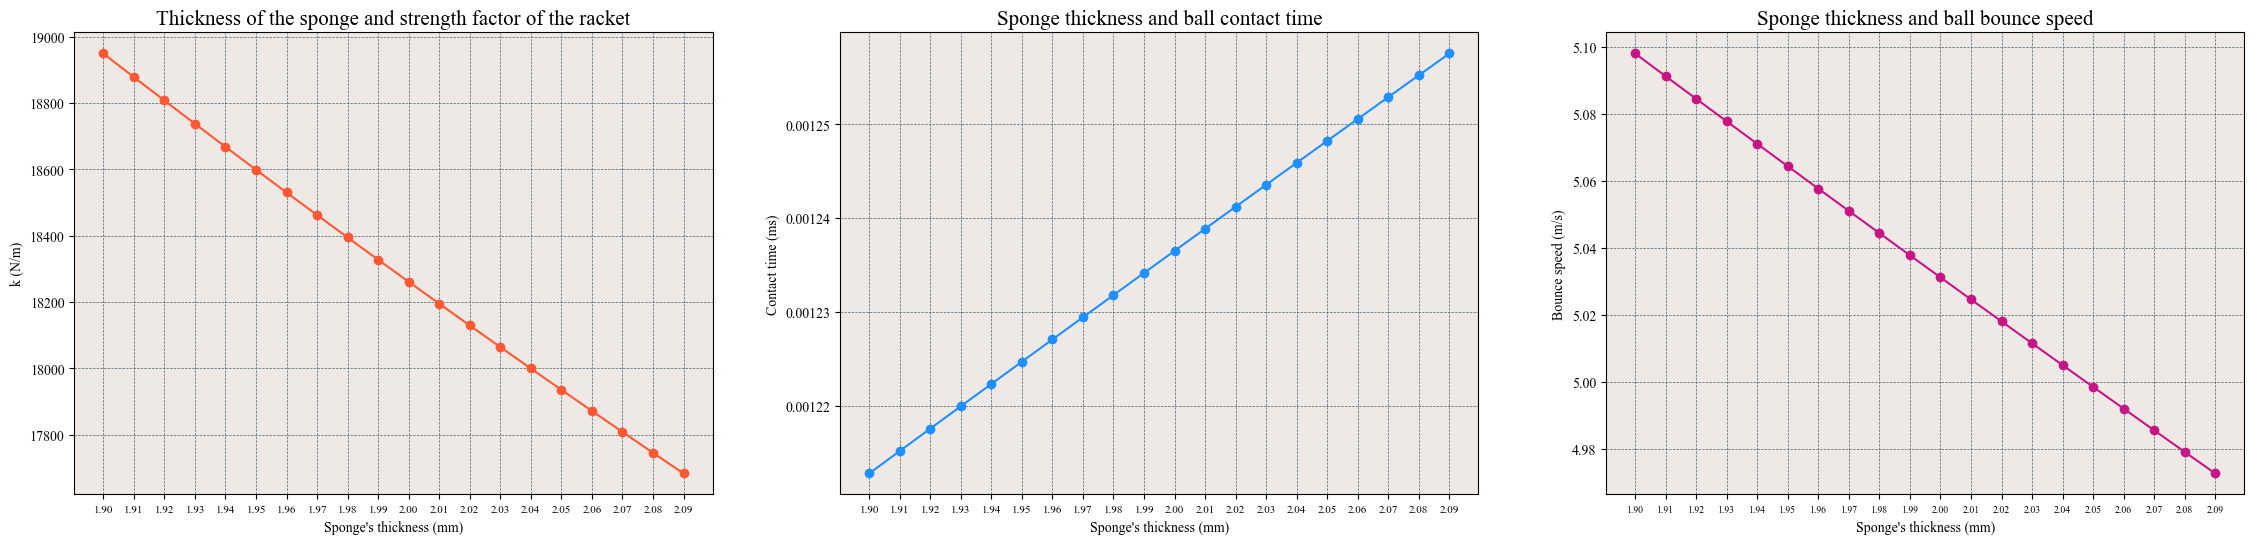

In [4]:
# The L of sponge's effect to the performance of racket
rackets_exp0 = [
    {
        "wood": [1.2 * 10**9, 3 * 10**-3],
        "sponge": [1 * 10**6, (1.9 + i / 100) * 10**-3],
        "rubber": [2 * 10**6, 1.5 * 10 ** -3]
    }
    for i in range(0, 20, 1)
]

ks, ts, v0s = zip(*[result(racket, 10, print_result = False) for racket in rackets_exp0])
# Visualize the result
x_index = [1.9 + i / 100 for i in range(0, 20, 1)]
plt.figure(figsize = (28, 6))
#plt.title("The effect of sponge's thickness to the performance of racket", fontsize = 20)
plt.subplot(131, facecolor = "#EFE9E6")
# Subtitle
plt.title("Thickness of the sponge and strength factor of the racket", fontsize = 15)
plt.grid(ls = "--", lw = 0.5, color = "#4E616C")
plt.plot(x_index, ks, marker = "o", color = "#FF5733")
plt.xlabel("Sponge's thickness (mm)")
plt.xticks(x_index, fontsize = 8)
plt.ylabel("k (N/m)")

plt.subplot(132, facecolor = "#EFE9E6")
plt.title("Sponge thickness and ball contact time", fontsize = 15)
plt.grid(ls = "--", lw = 0.5, color = "#4E616C")
plt.plot(x_index, ts, marker = "o", color = "dodgerblue")
plt.xlabel("Sponge's thickness (mm)")
plt.xticks(x_index, fontsize = 8)
plt.ylabel("Contact time (ms)")

plt.subplot(133, facecolor = "#EFE9E6")
plt.title("Sponge thickness and ball bounce speed", fontsize = 15)
plt.grid(ls = "--", lw = 0.5, color = "#4E616C")
plt.plot(x_index, np.abs(v0s), marker = "o", color = "mediumvioletred")
plt.xlabel("Sponge's thickness (mm)")
plt.xticks(x_index, fontsize = 7)
plt.ylabel("Bounce speed (m/s)")


plt.show()

## 2. 海绵硬度对球拍性能的影响（蛋糕海绵 OR 高密海绵）

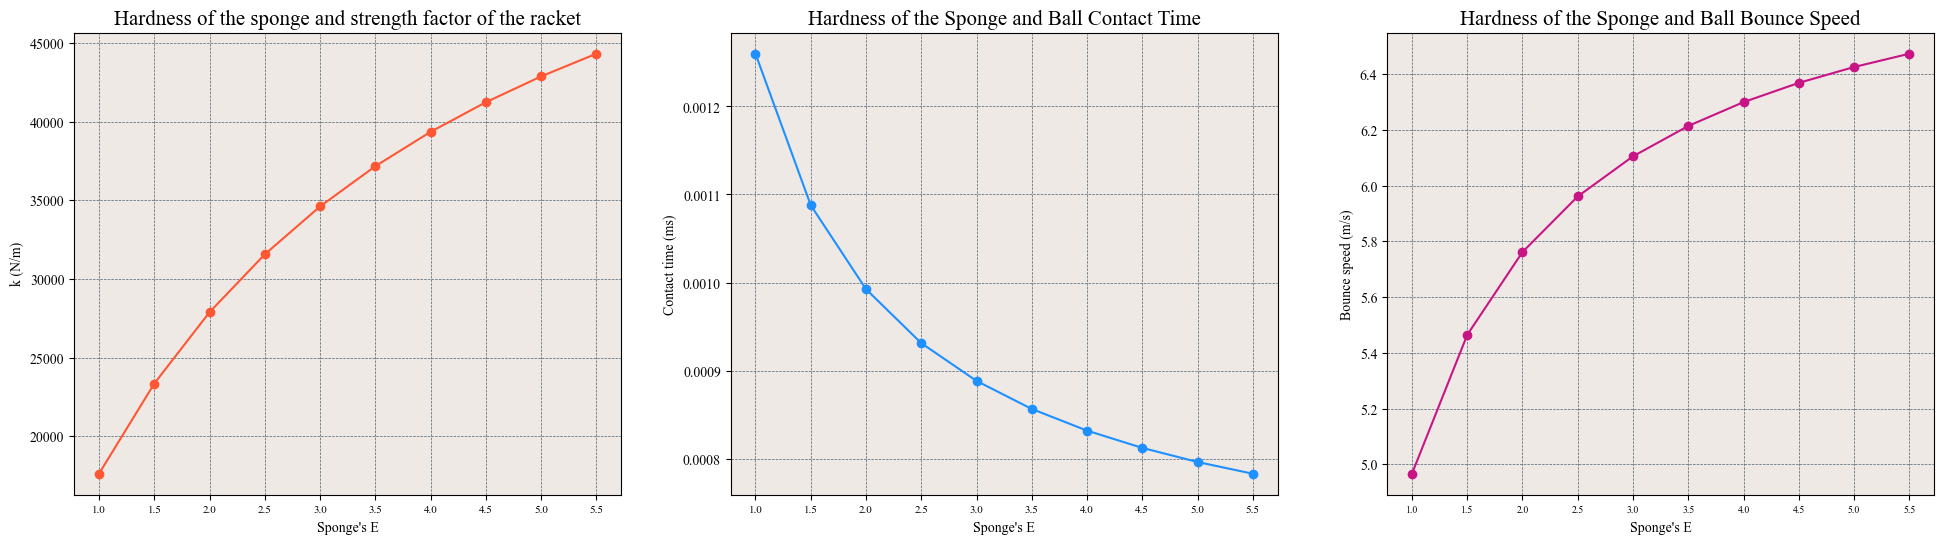

In [5]:
# The L of rubber's effect to the performance of racket
rackets_exp1 = [
    {
        "wood": [1.2 * 10**9, 3 * 10**-3],
        "sponge": [(1 + i / 20) * 10**6, 2.1 * 10**-3],
        "rubber": [2 * 10**6, (1.5) * 10 ** -3]
    }
    for i in range(0, 100, 10)
]

ks, ts, v0s = zip(*[result(racket, 10, print_result = False) for racket in rackets_exp1])
# Visualize the result
x_index = [(1 + i / 20) for i in range(0, 100, 10)]
plt.figure(figsize = (24, 6))
plt.subplot(131, facecolor = "#EFE9E6")
plt.title("Hardness of the sponge and strength factor of the racket", fontsize = 15)
plt.grid(ls = "--", lw = 0.5, color = "#4E616C")
plt.plot(x_index, ks, marker = "o", color = "#FF5733")
plt.xlabel("Sponge's E")
plt.xticks(x_index, fontsize = 8)
plt.ylabel("k (N/m)")

plt.subplot(132, facecolor = "#EFE9E6")
plt.title("Hardness of the Sponge and Ball Contact Time", fontsize = 15)
plt.grid(ls = "--", lw = 0.5, color = "#4E616C")
plt.plot(x_index, ts, marker = "o", color = "dodgerblue")
plt.xlabel("Sponge's E")
plt.xticks(x_index, fontsize = 8)
plt.ylabel("Contact time (ms)")

plt.subplot(133, facecolor = "#EFE9E6")
plt.title("Hardness of the Sponge and Ball Bounce Speed", fontsize = 15)
plt.grid(ls = "--", lw = 0.5, color = "#4E616C")
plt.plot(x_index, np.abs(v0s), marker = "o", color = "mediumvioletred")
plt.xlabel("Sponge's E")
plt.xticks(x_index, fontsize = 7)
plt.ylabel("Bounce speed (m/s)")

plt.show()

## 3. 碳纤维对球拍性能的影响

========== Result ==========
Spring constant: k = 17621.03
Time: t = 1.26 ms, bounce speed: v(t) = -4.97 m/s
========== Result ==========
Spring constant: k = 17621.02
Time: t = 1.24 ms, bounce speed: v(t) = -6.16 m/s
[0 1] [0.1 1.1] [0.2 1.2]


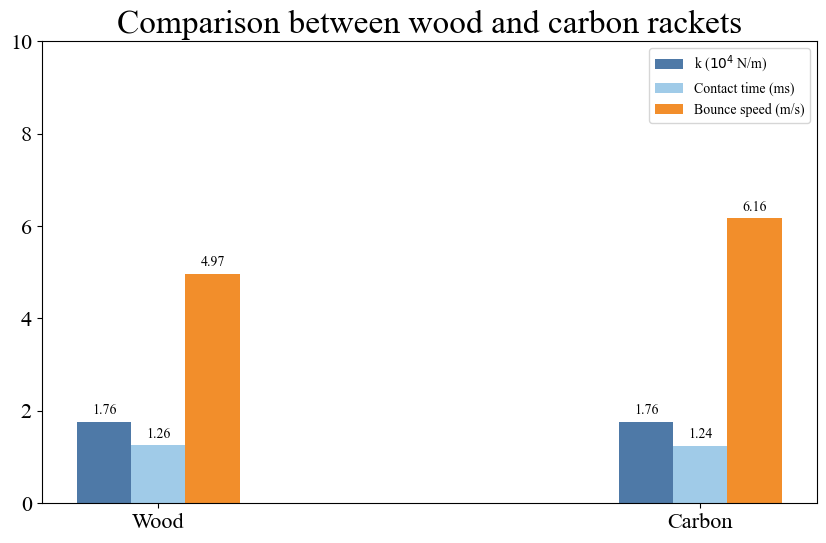

In [45]:
pure_wood_racket = {
    "wood": [1.2 * 10**9, 3 * 10**-3],
    "sponge": [1 * 10**6, 2.1 * 10**-3],
    "rubber": [2 * 10**6, 1.5 * 10 ** -3],
}

racket_with_carbon = {
    "wood": [1.2 * 10**9, 3 * 10**-3],
    "carbon": [1.21 * 10**11, 0.2 * 10**-3],
    "sponge": [1 * 10**6, 2.1 * 10**-3],
    "rubber": [2 * 10**6, 1.5 * 10 ** -3],
}

res_0 = result(pure_wood_racket, 10)
res_1 = result(racket_with_carbon, 10, c = 2.1)

colors = ["#4E79A7",  "#A0CBE8",  "#F28E2B",  "#FFBE7D",  "#59A14F",  "#8CD17D",  "#B6992D",  "#F1CE63",  "#499894",  "#86BCB6",  "#E15759",  "#E19D9A"]

plt.figure(figsize = (10, 6))
plt.title("Comparison between wood and carbon rackets", fontsize = 24)
materials = ["Wood", "Carbon"]
k_data = [res_0[0] / 1e4, res_1[0] / 1e4]
t_data = [res_0[1] * 1e3, res_1[1] * 1e3]
v_data = [np.abs(res_0[2]), np.abs(res_1[2])]

width = 0.1
x = np.arange(len(materials))
k_x = x
t_x = x + width
v_x = x + 2 * width

print(k_x, t_x, v_x)

plt.bar(k_x, k_data, width=width, color=colors[0], label="k ($10^4$ N/m)")
plt.bar(t_x, t_data, width=width, color=colors[1], label="Contact time (ms)")
plt.bar(v_x, v_data, width=width, color=colors[2], label="Bounce speed (m/s)")

plt.xticks(x + width, labels=materials, fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0, 10)
plt.legend()

for i, v in enumerate(k_data):
    plt.text(k_x[i], v + 0.1, round(v, 2), ha='center', va='bottom')
for i, v in enumerate(t_data):
    plt.text(t_x[i], v + 0.1, round(v, 2), ha='center', va='bottom')
for i, v in enumerate(v_data):
    plt.text(v_x[i], v + 0.1, round(v, 2), ha='center', va='bottom')

plt.show()

# 4. 胶面硬度对球拍性能的影响

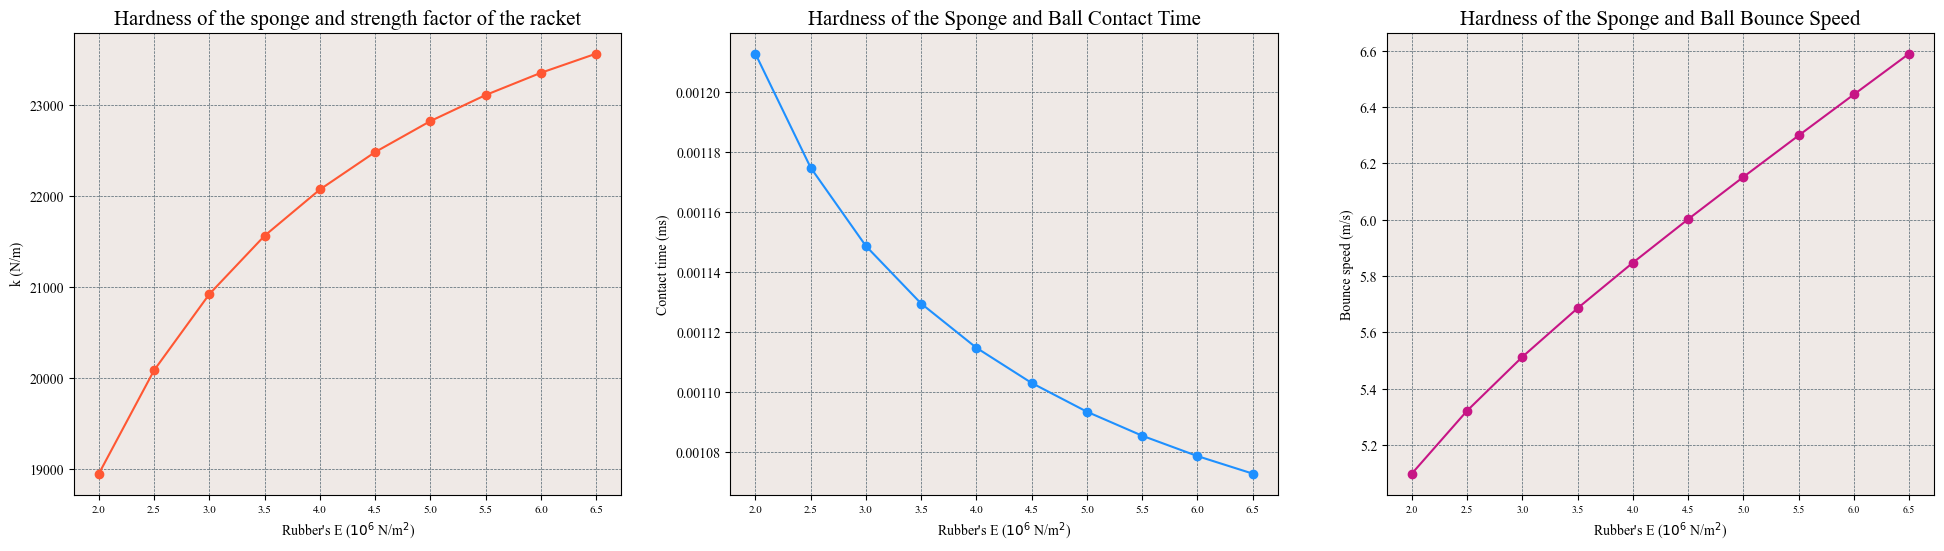

In [52]:
# The L of rubber's effect to the performance of racket
rackets_exp2 = [
    {
        "wood": [1.2 * 10**9, 3 * 10**-3],
        "sponge": [1 * 10**6, 1.9 * 10**-3],
        "rubber": [(2 + i / 20) * 10**6, (1.5) * 10 ** -3]
    }
    for i in range(0, 100, 10)
]
cs = [3.0 - i / 100 for i in range(0, 100, 10)]

ks, ts, v0s = zip(*[result(racket, 10, print_result = False, c = cs[idx]) for idx,racket in enumerate(rackets_exp2)])
# Visualize the result
x_index = [(2 + i / 20) for i in range(0, 100, 10)]

plt.figure(figsize = (24, 6))
plt.subplot(131, facecolor = "#EFE9E6")
plt.title("Hardness of the sponge and strength factor of the racket", fontsize = 15)
plt.grid(ls = "--", lw = 0.5, color = "#4E616C")
plt.plot(x_index, ks, marker = "o", color = "#FF5733")
plt.xlabel("Rubber's E ($10^6$ N/m$^2$)")
plt.xticks(x_index, fontsize = 8)
plt.ylabel("k (N/m)")

plt.subplot(132, facecolor = "#EFE9E6")
plt.title("Hardness of the Sponge and Ball Contact Time", fontsize = 15)
plt.grid(ls = "--", lw = 0.5, color = "#4E616C")
plt.plot(x_index, ts, marker = "o", color = "dodgerblue")
plt.xlabel("Rubber's E ($10^6$ N/m$^2$)")
plt.xticks(x_index, fontsize = 8)
plt.ylabel("Contact time (ms)")

plt.subplot(133, facecolor = "#EFE9E6")
plt.title("Hardness of the Sponge and Ball Bounce Speed", fontsize = 15)
plt.grid(ls = "--", lw = 0.5, color = "#4E616C")
plt.plot(x_index, np.abs(v0s), marker = "o", color = "mediumvioletred")
plt.xlabel("Rubber's E ($10^6$ N/m$^2$)")
plt.xticks(x_index, fontsize = 7)
plt.ylabel("Bounce speed (m/s)")

plt.show()